In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
m830 = pd.read_excel("./Yeast9_sub_use.xlsx", engine='openpyxl')
m900 = pd.read_excel("./Yeast9_curated_sub_use.xlsx", engine='openpyxl')
dataset = pd.read_table("./Biolog_Substrate.tsv")

In [3]:
def source(data, s):
    new_data = pd.DataFrame(columns=data.columns)
    for i in data.index:
        if data.loc[i, 'Substrate_type'] == s:
            new_data.loc[i, :] = data.loc[i, :]
    return new_data


def check_growth(data):
    c = [data.loc[i, 'Growth_Biolog'] == data.loc[i, 'Growth_Model'] for i in data.index]
    return np.sum(c)

In model m830, true prediction using C is 49
In model m830, true prediction using N is 51
In model m830, true prediction using P is 42
In model m830, true prediction using S is 10
In model m900, true prediction using C is 49
In model m900, true prediction using N is 51
In model m900, true prediction using P is 42
In model m900, true prediction using S is 10


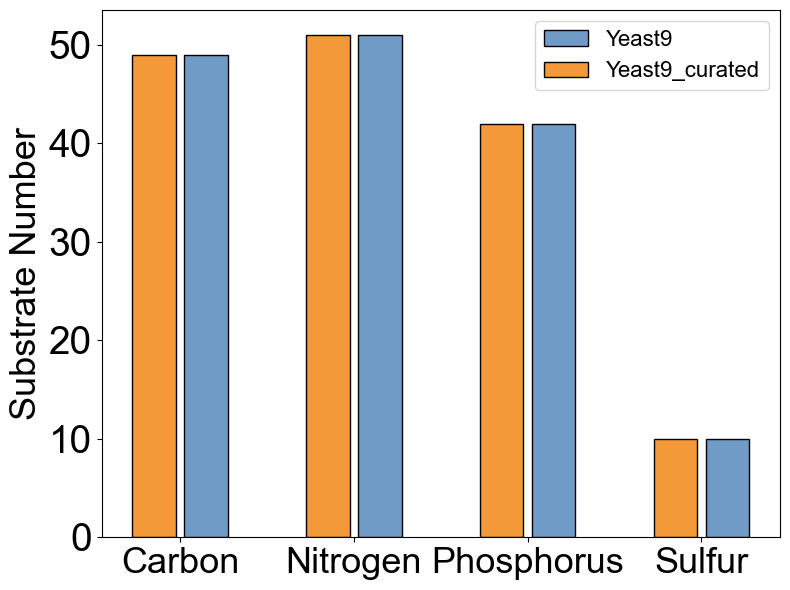

In [4]:
cover8 = []
cover9 = []
true8 = []
true9 = []
for s in ['C', 'N', 'P', 'S']:
    new_data = source(m830, s)
    ct = check_growth(new_data)
    cover = len(new_data.index)
    cover8.append(cover)
    true8.append(ct)
    print('In model m830, true prediction using {} is {}'.format(s, ct))
for s in ['C', 'N', 'P', 'S']:
    new_data = source(m900, s)
    ct = check_growth(new_data)
    cover = len(new_data.index)
    cover9.append(cover)
    true9.append(ct)
    print('In model m900, true prediction using {} is {}'.format(s, ct))
c = n = p = s = 0
for da in dataset.index:
    if dataset.loc[da, 'Substrate_type'] == 'C':
        c += 1
    elif dataset.loc[da, 'Substrate_type'] == 'N':
        n += 1
    elif dataset.loc[da, 'Substrate_type'] == 'P':
        p += 1
    elif dataset.loc[da, 'Substrate_type'] == 'S':
        s += 1
whole = [c, n, p, s]

################################################################、
# figure

sou = ['C', 'N', 'P', 'S']
barWidth = 0.25
r1 = np.arange(len(sou))
r2 = [x + 1.2*barWidth for x in r1]
r3 = [x + barWidth for x in r2]
bottom9 = []
for i in range(len(true9)):
        sum = true9[i] + cover9[i]
        bottom9.append(sum)
bottom8 = []
for i in range(len(true9)):
        sum = true8[i] + cover8[i]
        bottom8.append(sum)
plt.figure(figsize=(8, 6))
plt.axes().set_facecolor('white')

plt.bar(r2, true9, width=barWidth, color='#6f9bc6', edgecolor='Black', label='Yeast9')
plt.bar(r1, true8, width=barWidth, color='#f3993a', edgecolor='Black', label='Yeast9_curated')

# plt.bar(r1, cover9, width=barWidth, bottom=true9, color='#a4d4b0', edgecolor='white', label='substrates coverd by Yeast9')
# plt.bar(r2, cover8, width=barWidth, bottom=true8, color='#f6b683', edgecolor='white', label='substrates coverd by Yeast8')
#
# plt.bar(r3, whole, width=barWidth, color='#ddedd7', edgecolor='white', label='whole dataset')
font2 = {'family': 'Arial',
            'weight': 'normal',
            'size': 26,
            }
font3 = {'family': 'Arial',
            'weight': 'normal',
            'size': 16,
            }

plt.ylabel('Substrate Number', fontdict=font2)
plt.xticks([r + 1.2 *barWidth/2 for r in range(len(sou))],
            ['Carbon', 'Nitrogen', 'Phosphorus', 'Sulfur'],
            fontproperties='Arial', size=26)
plt.yticks(np.arange(0, 55, 10), fontproperties='Arial', size=28)
plt.tick_params(top=False, bottom=True, left=True, right=False)
plt.legend(prop=font3)
plt.tight_layout()
plt.savefig('sub_use.tif', dpi=600)
plt.show()


In [5]:
!pip uninstall xlrd

In [6]:
!conda list

# packages in environment at C:\Users\13293\APP\anaconda\envs\yeast9:
#
# Name                    Version                   Build  Channel
annotated-types           0.6.0                     <pip>
anyio                     4.3.0                     <pip>
appdirs                   1.4.4                     <pip>
asttokens                 2.0.5              pyhd3eb1b0_0  
backcall                  0.2.0              pyhd3eb1b0_0  
ca-certificates           2024.3.11            haa95532_0  
certifi                   2024.2.2                  <pip>
cobra                     0.29.0                    <pip>
colorama                  0.4.6            py38haa95532_0  
comm                      0.2.1            py38haa95532_0  
contourpy                 1.1.1                     <pip>
cycler                    0.12.1                    <pip>
debugpy                   1.6.7            py38hd77b12b_0  
decorator                 5.1.1              pyhd3eb1b0_0  
depinfo                   2.2.0    